<a href="https://colab.research.google.com/github/gdoteof/neuralnet_stuff/blob/master/rjokes_languagemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB

In [0]:
  !curl https://course-v3.fast.ai/setup/colab | bash

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls /content/drive/My\ Drive

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import sys
from fastai import *
from fastai.text import *

In [9]:
from google.colab import files

!rm onelinequoted.csv
uploaded = files.upload()

rm: cannot remove 'onelinequoted.csv': No such file or directory


In [0]:
PATH='.'
df=pd.read_csv('reddit_jokes.csv')

In [0]:
df['text'] = df['title'] + ' ZZZBODYZZZ ' + df['body']
df.head().T


,0,1,2,3,4
body,"Now I have to say ""Leroy can you please paint ...",Pizza doesn't scream when you put it in the ov...,...and being there really helped me learn abou...,A Sunday school teacher is concerned that his ...,He got caught trying to sell the two books to ...
id,5tz52q,5tz4dd,5tz319,5tz2wj,5tz1pc
score,1,0,0,1,0
title,I hate how you cant even say black paint anymore,What's the difference between a Jew in Nazi Ge...,I recently went to America....,"Brian raises his hand and says, “He’s in Heaven.”",You hear about the University book store worke...
text,I hate how you cant even say black paint anymo...,What's the difference between a Jew in Nazi Ge...,I recently went to America.... ZZZBODYZZZ ...a...,"Brian raises his hand and says, “He’s in Heave...",You hear about the University book store worke...


In [0]:
del df['body']
del df['title']
del df['id']

df.head().T

,0,1,2,3,4
score,1,0,0,1,0
text,I hate how you cant even say black paint anymo...,What's the difference between a Jew in Nazi Ge...,I recently went to America.... ZZZBODYZZZ ...a...,"Brian raises his hand and says, “He’s in Heave...",You hear about the University book store worke...


In [0]:
df['label'] = 'joke'
df['is_valid'] = False
df.head().T

,0,1,2,3,4
score,1,0,0,1,0
text,I hate how you cant even say black paint anymo...,What's the difference between a Jew in Nazi Ge...,I recently went to America.... ZZZBODYZZZ ...a...,"Brian raises his hand and says, “He’s in Heave...",You hear about the University book store worke...
label,joke,joke,joke,joke,joke
is_valid,False,False,False,False,False


In [0]:
df = df[df['score'] > 17]

NameError: ignored

In [0]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult=0.5)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [0]:
learn.freeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


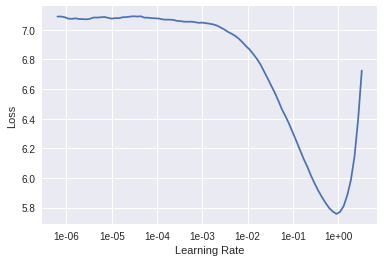

In [0]:

learn.recorder.plot()

In [0]:
learn.fit_one_cycle(3, 1e-1)

Total time: 00:46
epoch  train_loss  valid_loss  accuracy
1      4.009298    2.797916    0.509801  (00:15)
2      3.473971    2.767700    0.511202  (00:14)
3      3.142532    2.697963    0.516944  (00:15)



In [0]:
learn.fit_one_cycle(1, 1e-2, div_factor=100, moms=(0.8,0.7), wd=.5)

Total time: 00:15
epoch  train_loss  valid_loss  accuracy
1      2.465374    2.651704    0.523483  (00:15)



By executing this line a process was launched that took a bit of time. Let's dig a bit into it. Images could be fed (almost) directly into a model because they're just a big array of pixel values that are floats between 0 and 1. A text is composed of words, and we can't apply mathematical functions to them directly. We first have to convert them to numbers. This is done in two differents steps: tokenization and numericalization. A `TextDataBunch` does all of that behind the scenes for you.

Before we delve into the explanations, let's take the time to save the things that were calculated.

In [0]:
learn.predict("geoff", n_words=200)

Total time: 00:17



'geoff or ofc turned within me years apart we looked at the whole chappelle , documents instead places , can look at us checked house elicits in some personal campaign population money cited stats behind with the best combat naive is also dress west place to jump . purposes by adding soft case though \'s normal vision change side after " ) made the security sensitive by our times clients a t to do you ca n’t equally attractors broke step , be that report began daily mom though so you live now its a large bodies of course of a regular agent of this in nyc with a bunch \'s candidates of this control worms notes ; irrelevant with some issues such popular of data are kevin says her poetry due to call ... \n \n re launch or not his intellectual and then around a conference entities in this type of your vote there is of your ex , quote \n older cpus in those issues back late science \n\n xxbos xxfld 1 / 3 / power moved to the concept . / clionsourcecodeaccess \n my older \n\n xxbos xxfld 1 /

In [0]:
!mv chatdata/valid/log.txt chatdata/valid/a/log.txt

In [0]:
data_lm.save()

Next time we launch this notebook, we can skip the cell above that took a bit of time (and that will take a lot more when you get to the full dataset) and load those results like this:

> Indented block



In [0]:
data = TextLMDataBunch.load('chatdata')

### Tokenization

The first step of processing we make texts go through is to split the raw sentences into words, or more exactly tokens. The easiest way to do this would be to split the string on spaces, but we can be smarter:

- we need to take care of punctuation
- some words are contractions of two different words, like isn't or don't
- we may need to clean some parts of our texts, if there's HTML code for instance

To see what the tokenizer had done behind the scenes, let's have a look at a few texts in a batch.

In [0]:
data.vocab.itos

The texts are truncated at 100 tokens for more readability. We can see that it did more than just split on space and punctuation symbols: 
- the "'s" are grouped together in one token
- the contractions are separated like his: "did", "n't"
- content has been cleaned for any HTML symbol and lower cased
- there are several special tokens (all those that begin by xx), to replace unkown tokens (see below) or to introduce different text fields (here we only have one).

### Numericalization

Once we have extracted tokens from our texts, we convert to integers by creating a list of all the words used. We only keep the ones that appear at list twice with a maximum vocabulary size of 60,000 (by default) and replace the ones that don't make the cut by the unknown token `UNK`.

The correspondance from ids tokens is stored in the `vocab` attribute of our datasets, in a dictionary called `itos` (for int to string).

And if we look at what a what's in our datasets, we'll see the tokenized text as a representation:

In [0]:
data.train_ds[2]

But the underlying data is all numbers

In [0]:
data.train_ds[0][0].data[:10]

array([ 44,  45,  41,   2,  35, 172,  63,   7, 353,   4])

## Language model

We're not going to train a model that classifies the reviews from scratch. Like in computer vision, we'll use a model pretrained on a bigger dataset (a cleaned subset of wikipeia called [wikitext-103](https://einstein.ai/research/blog/the-wikitext-long-term-dependency-language-modeling-dataset)). That model has been trained to guess what the next word, its input being all the previous words. It has a recurrent structure and a hidden state that is updated each time it sees a new word. This hidden state thus contains information about the sentence up to that point.

We are going to use that 'knowledge' of the English language to build our classifier, but first, like for computer vision, we need to fine-tune the pretrained model to our particular dataset. Because the English of the reviex lefts by people on IMDB isn't the same as the English of wikipedia, we'll need to adjust a little bit the parameters of our model. Plus there might be some words extremely common in that dataset that were barely present in wikipedia, and therefore might no be part of the vocabulary the model was trained on.

Note that language models can use a lot of GPU, so you may need to decrease batchsize here.

In [0]:
bs=16

In [0]:
data_lm = (data.label_for_lm().databunch(bs=bs)



AttributeError: ignored

This is where the unlabelled data is going to be useful to us, as we can use it to fine-tune our model. Let's create our data object with the data block API (next line takes a few minutes).

In [0]:
:
data_lm = TextLMDataBunch.load(path, 'tmp_lm', bs=bs)

We have to use a special kind of `TextDataBunch` for the language model, that ignores the labels (that's why we put 0 everywhere), will shuffle the texts at each epoch before concatenating them all together (only for training, we don't shuffle for the validation set) and will send batches that read that text in order with targets that are the next word in the sentence.

The line before being a bit long, we want to load quickly the final ids by using the following cell.

In [0]:
data_lm = TextLMDataBunch.load("chatdata", 'tmp', bs=2)

In [0]:

data_lm = (TextList.from_folder('chatdata')                           
            .filter_by_folder(include=['train', 'valid']) 
            .random_split_by_pct(0.1)
            .label_for_lm()           
            .databunch(bs=bs))
data_lm.save('tmp_lm')

TypeError: ignored

We can then put this in a learner object very easily with a model loaded with the pretrained weights. They'll be downloaded the first time you'll execute the following line and stored in './fastai/models/' (or elsewhere if you specified different paths in your config file).

In [0]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult=0.3)

In [0]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


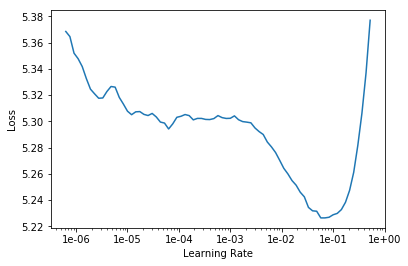

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

Total time: 12:42
epoch  train_loss  valid_loss  accuracy
1      4.591534    4.429290    0.251909  (12:42)



In [0]:
learn.save('fit_head')

In [0]:
learn.load('fit_head');

To complete the fine-tuning, we can then unfeeze and launch a new training.

In [0]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

Total time: 2:22:17
epoch  train_loss  valid_loss  accuracy
1      4.307920    4.245430    0.271067  (14:14)
2      4.253745    4.162714    0.281017  (14:13)
3      4.166390    4.114120    0.287092  (14:14)
4      4.099329    4.068735    0.292060  (14:10)
5      4.048801    4.035339    0.295645  (14:12)
6      3.980410    4.009860    0.298551  (14:12)
7      3.947437    3.991286    0.300850  (14:14)
8      3.897383    3.977569    0.302463  (14:15)
9      3.866736    3.972447    0.303147  (14:14)
10     3.847952    3.972852    0.303105  (14:15)



In [0]:
learn.save('fine_tuned')

How good is our model? Well let's try to see what it predicts after a few given words.

In [0]:
learn.load('fine_tuned');

In [0]:
learn.predict('I liked this movie because ', 100, temperature=1.1, min_p=0.001)

Total time: 00:10



'I liked this movie because  of course after yeah funny later that the world reason settings - the movie that perfect the kill of the same plot - a mention of the most of course . do xxup diamonds and the " xxup disappeared kill of course and the movie niece , from the care more the story of the let character , " i was a lot \'s the little performance is not only . the excellent for the most of course , with the minutes night on the into movies ( ! , in the movie its the first ever ! \n\n a'

We have to save the model but also it's encoder, the part that's responsible for creating and updating the hidden state. For the next part, we don't care about the part that tries to guess the next word.

In [0]:
learn.save_encoder('fine_tuned_enc')

## Classifier

Now, we'll create a new data object that only grabs the labelled data and keeps those labels. Again, this line takes a bit of time.

In [0]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/home/jhoward/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/home/jhoward/.fastai/data/imdb/models'),
 PosixPath('/home/jhoward/.fastai/data/imdb/tmp_lm'),
 PosixPath('/home/jhoward/.fastai/data/imdb/train'),
 PosixPath('/home/jhoward/.fastai/data/imdb/test'),
 PosixPath('/home/jhoward/.fastai/data/imdb/README'),
 PosixPath('/home/jhoward/.fastai/data/imdb/tmp_clas')]

In [0]:
(path/'train').ls()

[PosixPath('/home/jhoward/.fastai/data/imdb/train/pos'),
 PosixPath('/home/jhoward/.fastai/data/imdb/train/unsup'),
 PosixPath('/home/jhoward/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/home/jhoward/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/home/jhoward/.fastai/data/imdb/train/neg')]

In [0]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['neg', 'pos'])
             #remove docs with labels not in above list (i.e. 'unsup')
             .filter_missing_y()
             #label them all with their folders
             .databunch(bs=bs))
data_clas.save('tmp_clas')

In [0]:
len(data_clas.train_ds)

75000

In [0]:
data_clas = TextClasDataBunch.load(path, 'tmp_clas', bs=bs)
data_clas.show_batch()

text,label
"xxfld 1 match 1 : tag team table match bubba ray and spike dudley vs eddie guerrero and chris benoit bubba ray and spike dudley started things off with a tag team table match against eddie guerrero and chris benoit . according to the rules of the match , both",pos
"xxfld 1 i have never seen any of spike lee 's prior films , as their trailers never caught my interest . i have seen , and admire denzel washington , and jodie foster 's work , and have several of their dvds . i was , however , entirely",neg
"xxfld 1 pier paolo pasolini , or pee - pee - pee as i prefer to call him ( due to his love of showing male genitals ) , is perhaps xxup the most overrated european marxist director - and they are thick on the ground . how anyone can",neg
"xxfld 1 chris rock deserves better than he gives himself in "" down to earth . "" as directed by brothers chris & paul weitz of "" american pie "" fame , this uninspired remake of warren beatty 's 1978 fantasy "" heaven can wait , "" itself a rehash",neg
"xxfld 1 yesterday , i went to the monthly antique flea market that comes to town . i really have no interest in such things , but i went for the fellowship of friends who do have such an interest . looking over the hundreds of vendor , passing many",pos


We can then create a model to classify those reviews and load the encoder we saved before.

In [0]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')
learn.freeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


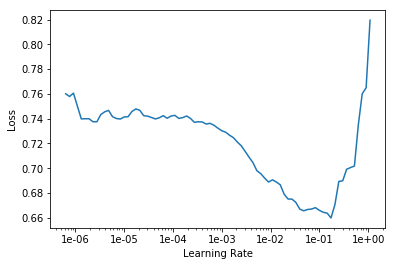

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

Total time: 02:46
epoch  train_loss  valid_loss  accuracy
1      0.294225    0.210385    0.918960  (02:46)



In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

Total time: 03:03
epoch  train_loss  valid_loss  accuracy
1      0.268781    0.180993    0.930760  (03:03)



In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [0]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

Total time: 04:06
epoch  train_loss  valid_loss  accuracy
1      0.211133    0.161494    0.941280  (04:06)



In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

Total time: 10:01
epoch  train_loss  valid_loss  accuracy
1      0.188145    0.155038    0.942480  (05:00)
2      0.159475    0.153531    0.944040  (05:01)



In [0]:
learn.predict("I really loved that movie, it was awesome!")

('pos', tensor(0), tensor([[9.9999e-01, 1.1991e-05]]))